In [227]:
import pystan
import numpy as np
from scipy.stats import norm
%matplotlib inline
import matplotlib.pyplot as plt
import arviz as az

The “eight schools” example appears in Section 5.5 of Gelman et al. (2003), which studied coaching effects from eight schools.

In [228]:
schools_code = """
data {
    int<lower=0> J; // number of schools
    vector[J] y; // estimated treatment effects
    vector<lower=0>[J] sigma; // s.e. of effect estimates
}
parameters {
    real mu;
    real<lower=0> tau;
    vector[J] eta;
}
transformed parameters {
    vector[J] theta;
    theta = mu + tau * eta;
}
model {
    eta ~ normal(0, 1);
    y ~ normal(theta, sigma);
}
"""

In [229]:
# compute mean and var for each day 
days = {'Sunday':
            [1.0883, 1.1071, 1.0943, 1.1089, 1.1629, 1.0994, 1.1022, 1.1364, 1.0903,
            1.1153, 1.097, 1.0978, 1.1393, 1.1653, 1.1104, 1.1099, 1.119, 1.0983,
            1.1145, 1.1225, 1.1196, 1.1165, 1.0868, 1.1154, 1.1494, 1.1467, 1.1457,
            1.0982, 1.098, 1.1299, 1.1162, 1.079, 1.1523],
        'Monday':
            [1.0426, 1.0589, 1.0564, 1.0509, 1.0745, 1.0509, 1.0609, 1.0691, 1.0632,
            1.0627, 1.0699, 1.0496, 1.0582, 1.0643, 1.0741, 1.0551, 1.0681, 1.0538,
            1.0657, 1.0581, 1.0471, 1.066, 1.0631, 1.0764, 1.0787, 1.059, 1.0383,
            1.0685, 1.0773, 1.0644, 1.068, 1.062, 1.077, 1.0622, 1.0764],
        'Tuesday':
            [1.0779, 1.0873, 1.092, 1.0805, 1.0971, 1.0823, 1.0857, 1.0797,
            1.0872, 1.0874, 1.1113, 1.1012, 1.0961, 1.0983, 1.0952, 1.0862,
            1.1066, 1.077, 1.093, 1.0867, 1.0851, 1.0907, 1.1207, 1.1011,
            1.0717, 1.0948, 1.1004, 1.0908, 1.0825, 1.0797, 1.0776, 1.0876,
            1.0795, 1.1051, 1.093, 1.1152, 1.0992, 1.0975, 1.1008, 1.1158,
            1.0933, 1.0948, 1.1047, 1.1025, 1.0936, 1.1072, 1.0844, 1.0954, 1.1066]}

# Y is the mean 
# sigma is the variance 
J = len(days.keys())
Y = np.zeros(J)
sigma = np.zeros(J)
for i,day in enumerate(days): 
    Y[i] = np.mean(days[day]) 
    sigma[i] = np.std(days[day])
    
print(sigma)
print(Y)

[0.02238639 0.00995762 0.01100427]
[1.11614545 1.06261143 1.09346939]


In [230]:
schools_dat = {'J': J,
               'y': Y,
               'sigma': sigma}

sm = pystan.StanModel(model_code=schools_code)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_19a09b474d1901f191444eaf8a6b8ce2 NOW.


Once a model is compiled, we can use the StanModel object multiple times. This saves us time compiling the C++ code for the model. For example, if we want to sample more iterations, we proceed as follows:

In [231]:
fit = sm.sampling(data=schools_dat, iter=10000, chains=4)
print(fit)

Inference for Stan model: anon_model_19a09b474d1901f191444eaf8a6b8ce2.
4 chains, each with iter=10000; warmup=5000; thin=1; 
post-warmup draws per chain=5000, total post-warmup draws=20000.

           mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
mu         1.09  2.3e-3   0.04    1.0   1.07   1.09    1.1   1.17    248   1.01
tau        0.06  2.2e-3   0.05 4.8e-3   0.02   0.04   0.07    0.2    519   1.01
eta[1]     0.46    0.02   0.73  -0.89  -0.04   0.43   0.93   1.97   1098    1.0
eta[2]    -0.59    0.02   0.72   -2.1  -1.04  -0.56   -0.1   0.75   1240    1.0
eta[3]     0.17    0.02   0.67  -1.09  -0.29   0.13   0.59   1.56   1140    1.0
theta[1]   1.11  3.1e-4   0.02   1.07   1.09   1.11   1.12   1.15   4781    1.0
theta[2]   1.07  1.0e-4   0.01   1.05   1.06   1.07   1.07   1.09   9149    1.0
theta[3]   1.09  1.0e-4   0.01   1.07   1.08   1.09    1.1   1.11  11204    1.0
lp__      -5.89    0.05   2.25 -11.25  -7.14  -5.55  -4.26  -2.49   1870    1.0

Samples 

In [232]:
fit.extract(permuted = True)

OrderedDict([('mu',
              array([1.0551326 , 1.08651693, 1.0658669 , ..., 1.08780028, 1.08913356,
                     1.08070993])),
             ('tau',
              array([0.11323295, 0.02722693, 0.02916469, ..., 0.01713229, 0.04575129,
                     0.00583791])),
             ('eta', array([[ 0.7408159 , -0.00850721,  0.27833858],
                     [ 0.41247274, -1.14160657,  0.29444419],
                     [ 1.17677363, -0.06147774,  0.81663167],
                     ...,
                     [ 0.20034133, -0.46771326,  0.53226668],
                     [ 0.60818923, -0.46877659, -0.15315185],
                     [-0.52017155,  0.8729093 ,  0.01412077]])),
             ('theta', array([[1.13901737, 1.0541693 , 1.0866497 ],
                     [1.09774729, 1.05543448, 1.09453374],
                     [1.10018713, 1.06407392, 1.0896837 ],
                     ...,
                     [1.09123258, 1.07978728, 1.09691923],
                     [1.116959  , 1.

In [233]:
y = np.array(schools_dat['y'])
sigma = np.array(schools_dat['sigma'])


(3,)
(3,)


The object fit, returned from function stan stores samples from the posterior distribution.

In [234]:
fit.extract(permuted = True)
mu = np.array(fit.extract()['mu'])
tau = np.array(fit.extract()['tau'])
eta = np.array(fit.extract()['eta'])
theta = np.array(fit.extract()['theta'])
lp = np.array(fit.extract()['lp__'])
print(mu.shape)
print(tau.shape)
print(eta.shape)
print(theta.shape)
print(lp.shape)

(20000,)
(20000,)
(20000, 3)
(20000, 3)
(20000,)


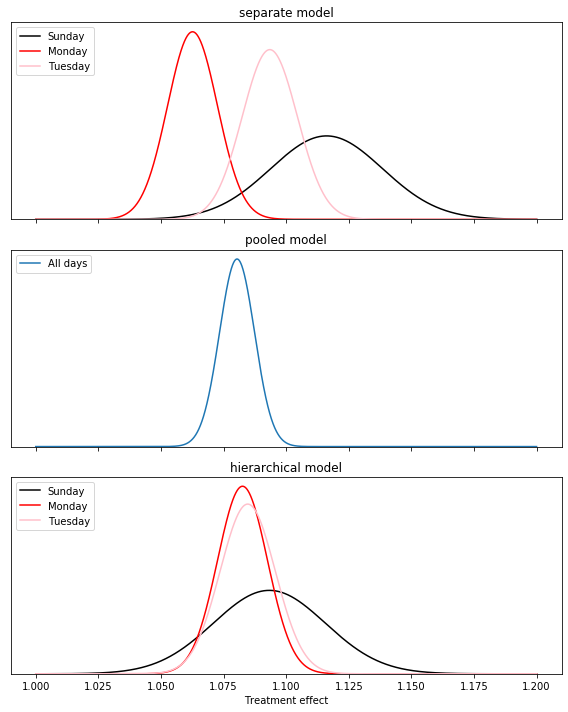

In [235]:
# plot the separate, pooled and hierarchical models
fig, axes = plt.subplots(3, 1, sharex=True, figsize=(8, 10))
x = np.linspace(1, 1.2, 20000)

# separate
ax = axes[0]
line1 = ax.plot(x, norm.pdf(x, y[0], sigma[0]), color='black')
line2 = ax.plot(x, norm.pdf(x, y[1], sigma[1]), color='red')
line3 = ax.plot(x, norm.pdf(x, y[2], sigma[2]), color='pink')
ax.legend(('Sunday','Monday','Tuesday'),loc='upper left'
)
ax.set_yticks(())
ax.set_title('separate model')
ax.set_ylim((0, ax.set_ylim()[1]))  # set y base to zero

# pooled
ax = axes[1]
ax.plot(
    x,
    norm.pdf(
        x,
        np.sum(y/sigma**2)/np.sum(1/sigma**2),
        np.sqrt(1/np.sum(1/sigma**2))
    ),
    label='All days'
)
ax.legend(loc='upper left')
ax.set_yticks(())
ax.set_title('pooled model')
ax.set_ylim((0, ax.set_ylim()[1]))  # set y base to zero

# hierarchical
ax = axes[2]
line1 = ax.plot(x, norm.pdf(x, np.mean(theta[0]), sigma[0]), color='black')
line2 = ax.plot(x, norm.pdf(x, np.mean(theta[1]), sigma[1]), color='red')
line3 = ax.plot(x, norm.pdf(x, np.mean(theta[2]), sigma[2]), color='pink')
ax.legend(('Sunday','Monday','Tuesday'),loc='upper left')
ax.set_yticks(())
ax.set_title('hierarchical model')
ax.set_xlabel('Treatment effect')
ax.set_ylim((0, ax.set_ylim()[1]))  # set y base to zero

fig.tight_layout()

OrderedDict([('mu', array(1.08039288)), ('tau', array(8.09611486e-07)), ('eta', array([ 6.06726105e-05, -1.48751000e-04,  6.92839437e-05])), ('theta', array([1.08039288, 1.08039288, 1.08039288]))])


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002A803CC7160>,
      dtype=object)

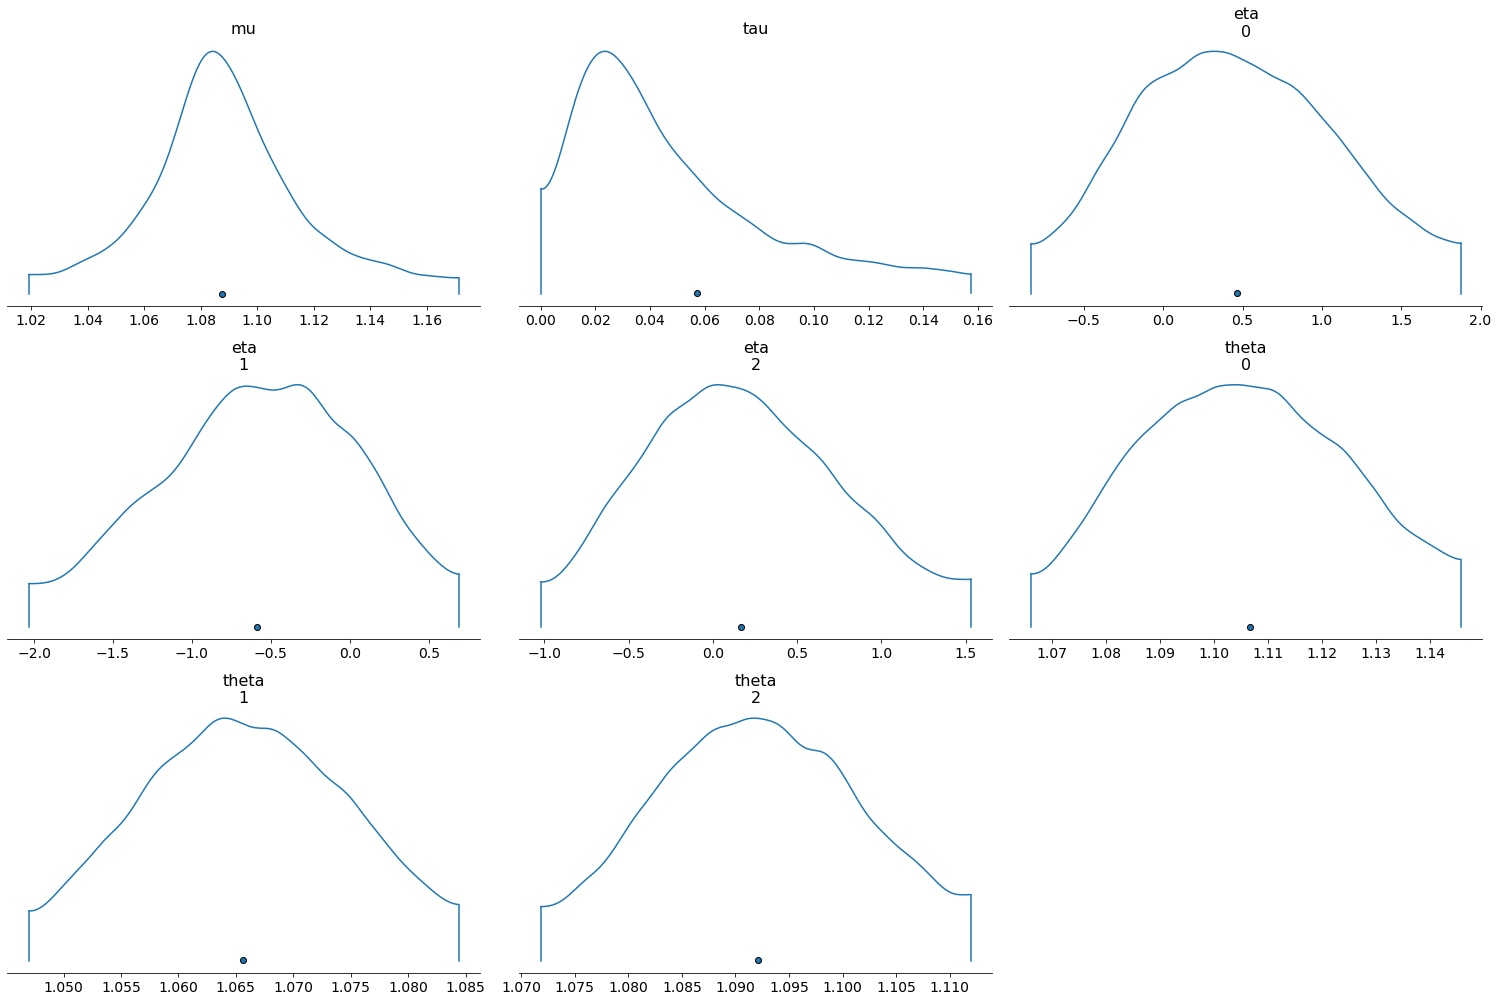

In [236]:
op = sm.optimizing(data=schools_dat)
theta = np.array(op['theta'])
print(op)

inf_data = az.convert_to_inference_data(fit)
az.plot_density(inf_data)